# GPT-4를 사용하여 이미지를 이해하는 방법

In [26]:
import os
import openai
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# OpenAI API 키 설정
openai.api_key = os.environ["OPENAI_API_KEY"]

client = openai.OpenAI()
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "이 그림에 대해 설명해줘."},
                {
                    "type": "image_url",
                    "image_url": image_url
                }
            ]
        }
    ],
    max_tokens=1000
)

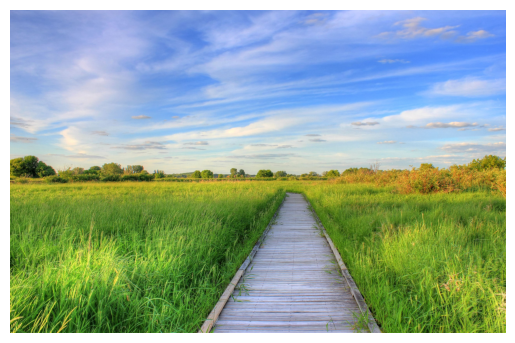

이 사진은 한 평화로운 자연 풍경을 보여줍니다. 탁 트인 파란 하늘이 인상적이며, 몇 구름이 가볍게 떠 있습니다. 빽빽한 초록색 풀이 자라는 넓은 들판을 한가운데 나무 데크 길이 관통하고 있어, 사진 속에서 길이 끝나는 지점까지 눈을 이끕니다. 이 길은 관람객들이 젖지 않게 하거나 주변의 자연환경을 보호하기 위해 설치된 것으로 보입니다. 나무와 관목이 자라는 구역이 사진의 오른쪽 끝에 약간 보이며, 이는 약간의 생태적 변화를 나타내는 듯합니다. 전체적으로 이 사진은 한적하고 자연스러운 분위기를 전달하며, 여유롭고 조용한 산책을 연상시킵니다.


In [28]:
# 이미지 다운로드
download_img = requests.get(image_url)
img = Image.open(BytesIO(download_img.content))

# 이미지 출력
plt.imshow(img)
plt.axis('off') # 축 정보 숨기기
plt.show()

# 응답 출력
print(response.choices[0].message.content)

# Base 64로 인코딩된 이미지 업로드
로컬에 이미지 또는 이미지 세트가 있는 경우 이를 Base 64 인코딩 형식으로 모델에 전달할 수 있습니다. 다음은 이에 대한 실제 예입니다.

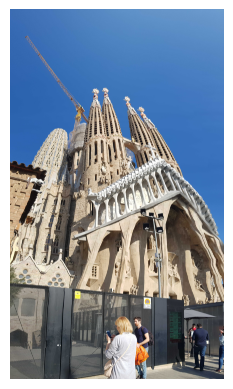

이 사진은 스페인 바르셀로나에 있는 유명한 사그라다 파밀리아 성당(Sagrada Familia)의 모습입니다. 이 성당은 카탈루냐 지방의 건축가 안토니 가우디(Antoni Gaudí)에 의해 디자인되었으며, 그의 가장 유명한 작품 중 하나로 여겨집니다. 1882년에 착공하여 오늘날까지도 완공되지 않은 상태로, 가우디의 복잡하고 자연주의적인 디자인 때문에 건설이 매우 오래 걸렸습니다.

사진은 사그라다 파밀리아의 외관을 보여주고 있으며 비탈식 입면으로 잘 알려진 장면을 포착했습니다. 여기에는 종탑들과 섬세한 조각이 가득한 파사드가 보입니다. 또한 사진에는 여러 사람들이 성당 주변에 있으며, 한 여성이 휴대전화를 보고 있는 모습, 다른 사람들은 서로 대화를 나누고 있거나 건물을 바라보고 있습니다. 크레인이 성당 상단에 보이는 것으로 볼 때, 이 사진은 건축이 진행 중인 상황에서 촬영된 것으로 추정됩니다. 하늘은 매우 맑고, 날씨는 화창해 보입니다.


In [39]:
import base64
import requests
import os
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# OpenAI API 키 설정
api_key = os.environ["OPENAI_API_KEY"]

# 이미지를 base64로 인코딩하는 함수
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# 이미지 경로
image_path = "asset/images/test_1.jpg"

# base64 문자열 얻기
base64_image = encode_image(image_path)

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": "이 사진에 대해 설명해줘"
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 1000
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
# 'content' 부분만 추출하여 출력
content = response.json()['choices'][0]['message']['content']

# 이미지 표시
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # 축 정보 숨기기
plt.show()

# 응답 출력
print(content)

# 다중 이미지 입력
Chat Completions API는 base64로 인코딩된 형식이나 이미지 URL로 여러 이미지 입력을 가져와 처리할 수 있습니다. 모델은 각 이미지를 처리하고 모든 이미지의 정보를 사용하여 질문에 답합니다.

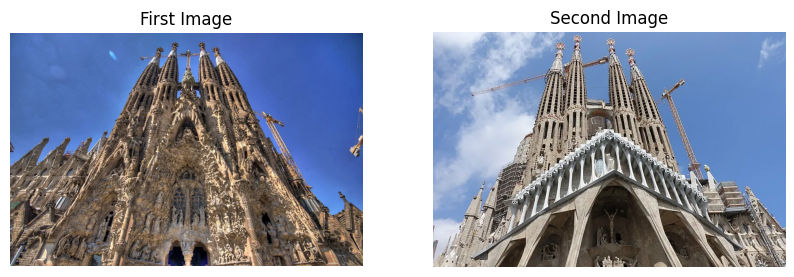

두 이미지 모두 스페인 바르셀로나에 있는 유명한 사그라다 파밀리아 성당의 파사드를 보여줍니다. 두 이미지 사이에는 몇 가지 차이점이 있습니다.

첫 번째 이미지는 성당의 '탄생 파사드'(Nativity Facade) 입니다. 이 파사드는 성당의 전체적인 건축과 조각의 세부 사항이 풍부하고 복잡하게 표현되어 있음을 볼 수 있습니다. 또한, 부자연스러운 파란색과 갈색의 강렬한 색조가 강조된 HDR(High Dynamic Range) 사진으로 보입니다.

두 번째 이미지는 성당의 '고난 파사드'(Passion Facade)를 보여줍니다. 이 파사드는 첫 번째 파사드에 비해 조형이 간결하고 모던한 스타일을 반영하고 있으며, 좀 더 최근에 작업된 부분입니다. 구조물의 윤곽이 더 뚜렷하고 색상이 자연스러운 톤을 유지하고 있습니다.

두 파사드 모두 안토니 가우디의 설계에 따라 건축되었지만, 가우디는 탄생 파사드의 상세한 작업에 참여했고, 고난 파사드는 그의 사후에 다른 건축가들에 의해 계속해서 작업되었습니다. 사그라다 파밀리아는 가우디의 작품 중 가장 유명한 건축물이며, 세계에서 가장 독특한 건축 스타일을 가진 성당 중 하나로 꼽힙니다.


In [27]:
import os
import openai
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# OpenAI API 키 설정
openai.api_key = os.environ["OPENAI_API_KEY"]

client = openai.OpenAI()

# 이미지 경로
image_path1 = "https://github.com/yunwoong7/getting_started_with_pynecone/assets/69428232/94d9f9d6-e28f-42c1-ab83-b5ef4f1001b2"
image_path2 = "https://github.com/yunwoong7/getting_started_with_pynecone/assets/69428232/56bd5b07-ee0e-4a1c-9745-9afd0c0b26a0"

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "이 이미지에는 무엇이 있나요? 두 이미지 사이에 어떤 차이가 있나요? 어떤 파사드인지도 알려주세요.",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_path1,
                    },
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_path2,
                    },
                },
            ],
        }
    ],
    max_tokens=1000,
)

# 이미지 로딩
# 이미지 다운로드
download_img1 = requests.get(image_path1)
download_img2 = requests.get(image_path2)
img1 = Image.open(BytesIO(download_img1.content))
img2 = Image.open(BytesIO(download_img2.content))

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 첫 번째 이미지 표시
axes[0].imshow(img1)
axes[0].axis('off')  # 첫 번째 이미지의 축 정보 숨기기
axes[0].set_title('First Image')

# 두 번째 이미지 표시
axes[1].imshow(img2)
axes[1].axis('off')  # 두 번째 이미지의 축 정보 숨기기
axes[1].set_title('Second Image')

# 전체 플롯 표시
plt.show()

# 응답 출력
print(response.choices[0].message.content)

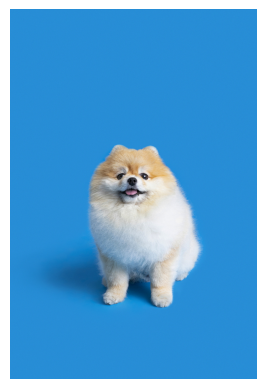

0.262, 0.187, 0.738, 0.96


In [18]:
import base64
import requests
import os
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# OpenAI API 키 설정
api_key = os.environ["OPENAI_API_KEY"]

# 이미지를 base64로 인코딩하는 함수
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# 이미지 경로
image_path = "asset/images/test_3.jpg"

# base64 문자열 얻기
base64_image = encode_image(image_path)

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": "Can you tell me the location of the dog on the image. Share the x_min, y_min, x_max and y_max in 0-1 normalized space. Only return the numbers, nothing else."
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 1000
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
# 'content' 부분만 추출하여 출력
content = response.json()['choices'][0]['message']['content']

# 이미지 표시
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # 축 정보 숨기기
plt.show()

# 응답 출력
print(content)

# 문자열을 쉼표로 분할하고 각 부분을 실수로 변환
x_min, y_min, x_max, y_max = [float(value.strip()) for value in content.split(',')]

In [19]:
import cv2
from utils.image_util import plt_imshow, put_text
img = cv2.imread(image_path)

In [20]:
roi_img = img.copy()

In [21]:
# 이미지의 너비와 높이
height, width = img.shape[:2]

# 정규화된 좌표
# 예를 들어: x_min = 0.1, y_min = 0.1, x_max = 0.9, y_max = 0.9
# x_min = 0.25
# y_min = 0.39
# x_max = 0.72
# y_max = 0.85

# 정규화된 좌표를 실제 픽셀 좌표로 변환
tlX = int(x_min * width)
tlY = int(y_min * height)
brX = int(x_max * width)
brY = int(y_max * height)

# 사각형 그리기
roi_img = cv2.rectangle(roi_img, (tlX, tlY), (brX, brY), (0, 255, 0), 2)

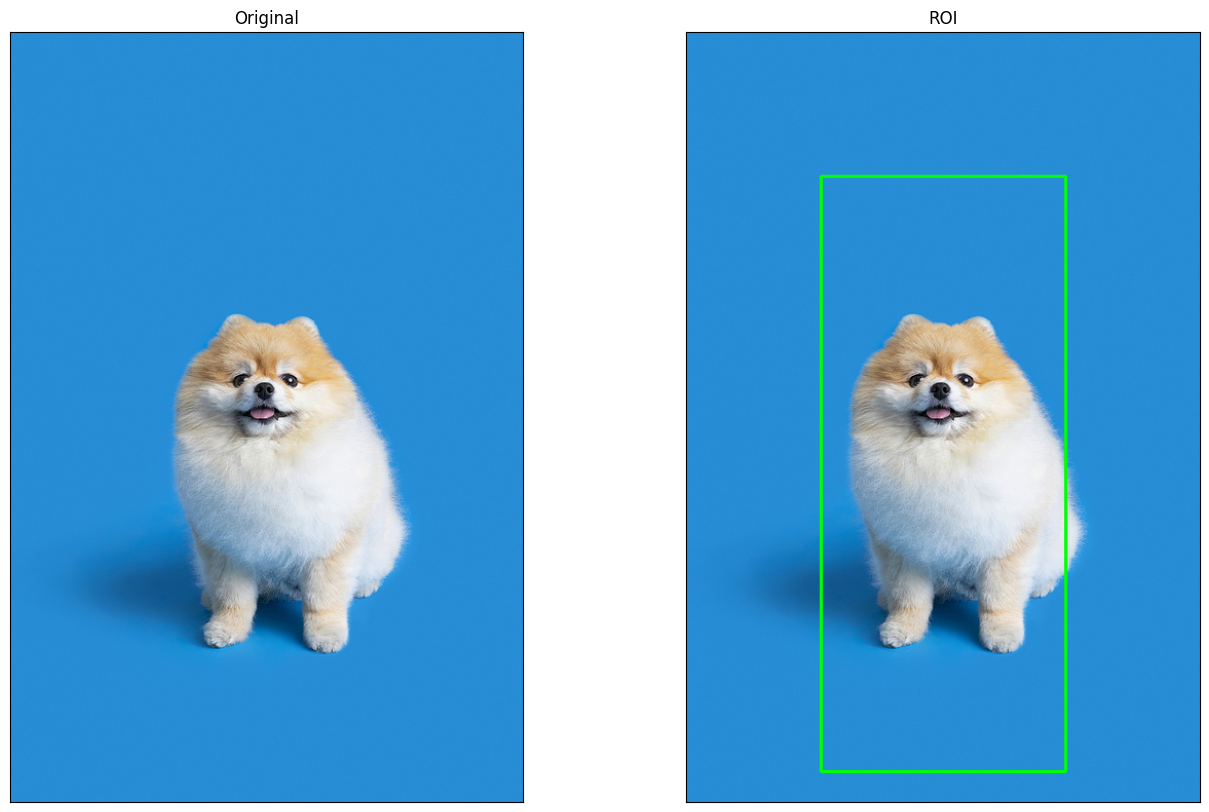

In [22]:
plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))

## OCR

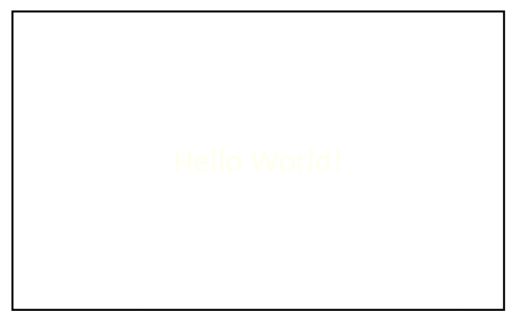

이미지에서 텍스트를 추출했습니다: "Hello World!"


In [48]:
import base64
import requests
import os
from PIL import Image
import matplotlib.pyplot as plt

def encode_image_to_base64(image_path):
    """
    지정된 이미지 파일을 base64 형식으로 인코딩한다.
    """
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def perform_ocr(image_path, api_key):
    """
    주어진 이미지에서 OCR을 수행하여 텍스트를 추출한다.
    """
    # 이미지를 base64로 인코딩
    base64_image = encode_image_to_base64(image_path)

    # 요청 헤더 설정
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }

    # 요청 본문 구성
    payload = {
        "model": "gpt-4-vision-preview",
        "messages": [
          {
            "role": "user",
            "content": [
              {
                "type": "text",
                "text": "이 사진에서 텍스트 추출해서 OCR 수행해줘"
              },
              {
                "type": "image_url",
                "image_url": {
                  "url": f"data:image/jpeg;base64,{base64_image}"
                }
              }
            ]
          }
        ],
        "max_tokens": 1000
    }

    # OpenAI API 요청
    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    
    # 응답에서 텍스트 내용 추출
    return response.json()['choices'][0]['message']['content']

def display_image_with_text(image_path, text):
    """
    이미지를 표시하고 OCR 결과를 출력한다.
    """
    # 이미지 로딩 및 표시
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # 축 정보 숨기기
    plt.show()

    # OCR 결과 출력
    print(text)

# OpenAI API 키 설정
api_key = os.environ["OPENAI_API_KEY"]

# 이미지 경로
image_path = "asset/images/ocr_test3.png"

# OCR 수행
ocr_result = perform_ocr(image_path, api_key)

# 결과 표시
display_image_with_text(image_path, ocr_result)

## Face Recognition

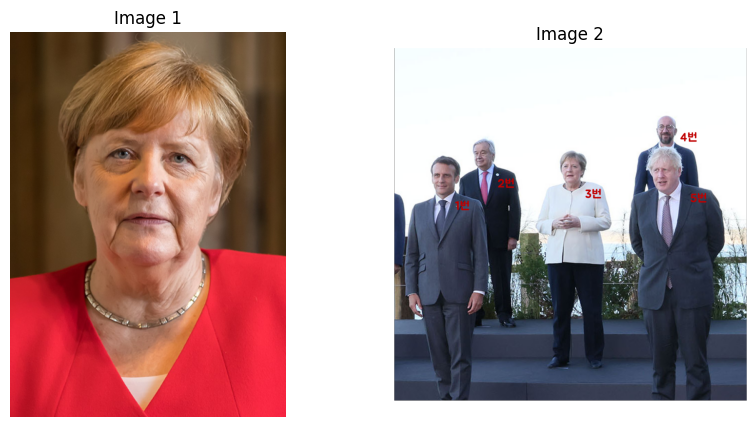

죄송하지만, 저는 실제 인물의 신원을 밝히거나 그들이 누구인지 알려줄 수 없습니다. 첫 번째 이미지의 사람은 두 번째 이미지에서 3번에 해당합니다.


In [47]:
import os
import openai
from PIL import Image
import matplotlib.pyplot as plt
import base64

# 이미지들을 base64로 인코딩하는 함수
def encode_images(image_paths):
    encoded_images = []
    for image_path in image_paths:
        with open(image_path, "rb") as image_file:
            encoded_images.append(base64.b64encode(image_file.read()).decode('utf-8'))
    return encoded_images

# OpenAI API 키 설정
openai.api_key = os.environ["OPENAI_API_KEY"]

client = openai.OpenAI()

# 응답을 표시하는 함수
def display_response(image_paths, response_text):
    # 이미지 로딩 및 서브플롯 생성
    fig, axes = plt.subplots(nrows=1, ncols=len(image_paths), figsize=(5 * len(image_paths), 5))
    if len(image_paths) == 1:  # 하나의 이미지인 경우
        axes = [axes]

    # 이미지들 표시
    for i, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')  # 축 정보 숨기기
        axes[i].set_title(f'Image {i+1}')

    # 전체 플롯 표시
    plt.show()

    print(response_text)

def process_and_display_images(image_paths, prompt):
    # base64 문자열 얻기
    base64_images = encode_images(image_paths)

    # OpenAI에 요청 보내기
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": prompt}
            ] + [{"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}} for base64_image in base64_images]
        }
    ]

    response = client.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=messages,
        max_tokens=1000
    )

    # 응답과 이미지 표시
    display_response(image_paths, response.choices[0].message.content)

# 예시: 이미지 경로 리스트
image_paths = ["asset/images/test4.png", "asset/images/test2.png",]  # N개의 이미지 경로
prompt = "첫번째 이미지의 사람이 두번째 이미지에 몇번에 해당하는 지 찾아서 알려주세요."
process_and_display_images(image_paths, prompt)

## Classification

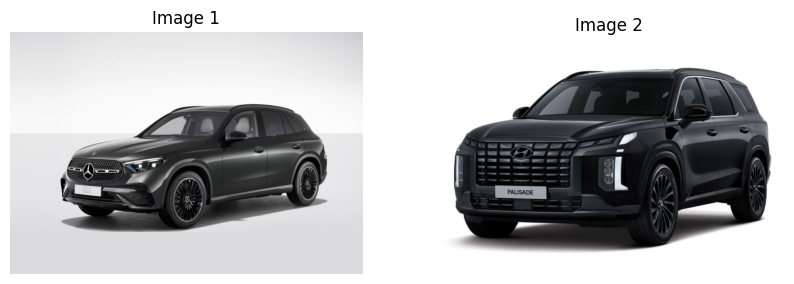

첫 번째 이미지의 차량은 '벤츠' 클래스에 속하고, 두 번째 이미지의 차량은 '현대' 클래스에 속합니다.


In [62]:
# 예시: 이미지 경로 리스트
image_paths = ["asset/images/test6.png", "asset/images/test7.png"]  # N개의 이미지 경로
classes = ["벤츠", "기아", "현대"]
prompt = "이미지를 분석하여 이미지에 있는 객체의 클래스를 반환합니다. 해당 목록에서는 하나의 클래스만 반환할 수 있습니다. 클래스는 다음과 같습니다: {}".format(classes)
process_and_display_images(image_paths, prompt)

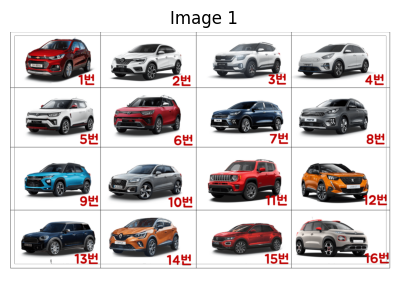

이 이미지에는 다양한 차량이 있지만, 아우디 차량은 10번입니다.


In [63]:
# 예시: 이미지 경로 리스트
image_paths = ["asset/images/test_6.png"]  # N개의 이미지 경로
prompt = "아우디 차만 찾아서 번호를 알려줘"
process_and_display_images(image_paths, prompt)